<a href="https://colab.research.google.com/github/polivio/AM/blob/master/KDD_BR_Rel3l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.kaggle.com/c/kddbr-2019/data

# KNN KDD BR -Polivio
import numpy as np
from sklearn import preprocessing, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# auxílio para métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics # https://youtu.be/6dbrR-WymjI
from sklearn.preprocessing import MinMaxScaler

#modelos
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


# Normalização
from sklearn.preprocessing import MinMaxScaler

In [0]:
# preprocessing # blob # raw
train = pd.read_csv('https://github.com/polivio/PEE/raw/master/Training_grouped.csv')
test = pd.read_csv('https://github.com/polivio/PEE/raw/master/Test_grouped.csv')



In [44]:
# separando o id, features e label para preprocessamento
idTrain = train.loc[:,['traininglabelorder.scatterplotID']]
features = train.loc[:,['qtde.ponto', 
       'mean.signalX', 'sd.signalX', 'kurtosis.signalX',
      'mean.signalY', 'sd.signalY', 
       'kurtosis.signalY', 'L', 'X', 'XY', 'Y',
       'mean.silhouette' ]]

labelTrain = train.loc[:,['traininglabelorder.score']]

features.head()

,qtde.ponto,mean.signalX,sd.signalX,kurtosis.signalX,mean.signalY,sd.signalY,kurtosis.signalY,L,X,XY,Y,mean.silhouette
0,365,3164.835616,804.757625,3.516731,1586.430137,568.651580,3.170632,4,92.0,269.0,NaN,0.840146
1,384,1737.776042,944.798845,2.475172,2999.940104,1716.790542,2.195067,4,82.0,49.0,249.0,0.964427
2,373,1139.621984,866.460225,1.922726,1836.640751,950.478945,1.436889,4,156.0,7.0,206.0,0.936210
3,384,3609.692708,1808.877599,1.985210,2469.164062,1219.231193,1.913381,4,100.0,190.0,90.0,0.896070
4,383,1867.203655,938.232021,2.176598,2180.908616,1515.205489,1.155226,4,176.0,2.0,201.0,0.952810


In [0]:
idVal = test.loc[:,['testorder.ID']]
featuresval = test.loc[:,[ 'qtde.ponto', 
       'mean.signalX', 'sd.signalX', 'kurtosis.signalX',
      'mean.signalY', 'sd.signalY', 
       'kurtosis.signalY', 'L', 'X', 'XY', 'Y',
       'mean.silhouette']]

#featuresval.head()

In [0]:

# change the dtype to 'float64' 
features = features.astype('float64')
featuresval = featuresval.astype('float64')

# Substituição pela média para os clusters com NA
features['X'].fillna(features['X'].mean(),inplace=True)
features['XY'].fillna(features['XY'].mean(),inplace=True)
features['Y'].fillna(features['XY'].mean(),inplace=True)



# Substituição pela média para os clusters com NA
featuresval['X'].fillna(featuresval['X'].mean(),inplace=True)
featuresval['XY'].fillna(featuresval['XY'].mean(),inplace=True)
featuresval['Y'].fillna(featuresval['XY'].mean(),inplace=True)


In [47]:

from sklearn.preprocessing import MinMaxScaler

##  normalização antes
scaler = MinMaxScaler() 

# Normalizando dados de validação para serem usados no Kaggle
print(scaler.fit(featuresval))

featuresval = scaler.transform(featuresval)

print(featuresval)


MinMaxScaler(copy=True, feature_range=(0, 1))
[[1.         0.35069271 0.23304664 ... 0.43799472 0.24538259 0.95914333]
 [1.         0.1887101  0.1238514  ... 0.49604222 0.2585752  0.94168467]
 [0.99468085 0.25496863 0.48110143 ... 0.18997361 0.66754617 0.98067533]
 ...
 [0.99468085 0.4790201  0.57176292 ... 0.11609499 0.3298153  0.9492964 ]
 [1.         0.15521992 0.13268455 ... 0.02902375 0.49076517 0.98217308]
 [0.98670213 0.40946428 0.43198796 ... 0.55145119 0.2348285  0.94488508]]


In [0]:
# Separação de features e label para serem utilizadas em modelos
# separando o array em para 25% para teste com os dados de treinamento.

X_train, X_test, y_train, y_test = train_test_split(features, labelTrain, test_size=0.25, random_state=10)



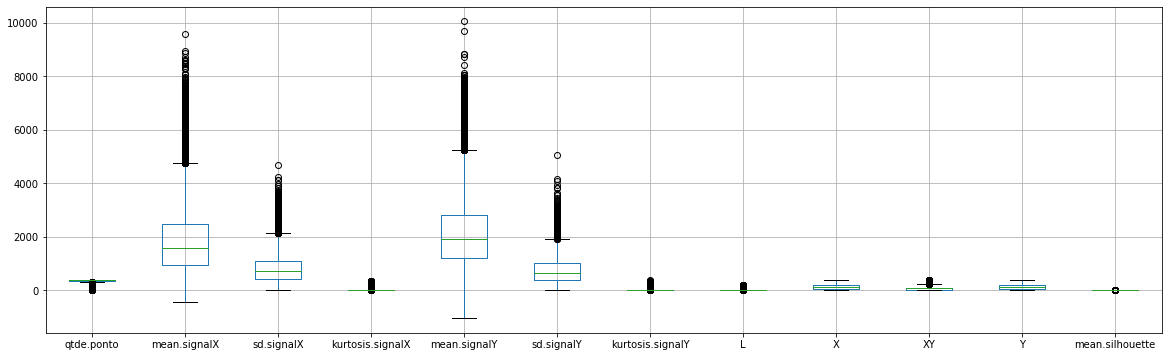

In [50]:
# testes:
X_train.boxplot(figsize=(20,6))

Primeiro Modelo KNN

In [0]:
# Dicas João Paulo e João Pedro, usar GridSearch com CV! ao invés de for .... 
# Search for an optimal value of K for KNN
k_range = [1,3,5,7,11,13,17,19,23,29,31]
k_scores = []
for k in k_range:
  clf = neighbors.KNeighborsRegressor(n_neighbors=k)
  scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error') # não encontrei rmse direto
  k_scores.append(scores.mean())
  print(k)
print(k_scores)
  
  
  # Para k = 7 apresentou melhor valor 
  

1
3
5
7
11
13
17
19
23
29
31
[-0.08462996431326059, -0.060970033359571574, -0.05744442456110636, -0.056928566060806464, -0.05740667640186954, -0.05775505297510408, -0.05868360639566457, -0.05909398843847539, -0.05985399123543207, -0.0609149963117228, -0.06129042933101282]


In [0]:
# Cálculos para transformar na métrica em comum rmse
k_scores = [(x * -1 ) for x in k_scores]
print(k_scores)


[0.08462996431326059, 0.060970033359571574, 0.05744442456110636, 0.056928566060806464, 0.05740667640186954, 0.05775505297510408, 0.05868360639566457, 0.05909398843847539, 0.05985399123543207, 0.0609149963117228, 0.06129042933101282]
[-0.08462996431326059, -0.060970033359571574, -0.05744442456110636, -0.056928566060806464, -0.05740667640186954, -0.05775505297510408, -0.05868360639566457, -0.05909398843847539, -0.05985399123543207, -0.0609149963117228, -0.06129042933101282]


In [0]:
# raíz do menor erro

print(sqrt(0.056928566060806464))

0.23859707890250137


In [0]:
# Comando para validação de parâmetros de scorers.
#import sklearn 
#sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [0]:
# plot the value k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('cross-validated accuracy')

In [0]:
# Comando para identricar os hiperparâmetros utilizados 
print(clf)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')


Old - testes anteriores sem cross validation e sem ver melhor número de n-neighbors, com base nos clusters (análise errada)
Dica de João Pedro sem número ímpar por desempate.

In [0]:
# Primeira versão 
# classsifiers KNN

clf = neighbors.KNeighborsRegressor(n_neighbors=4)
clf.fit(X_train , y_train)

# Validando com 25 % dos dados de treinametno.... E após fazer a validação com os dados de teste (20.000), atenção normalizar antes ...
y_pred = clf.predict(X_test)


In [0]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
print (rmse)

0.242298889493992


In [0]:
#Fazer testes no site do kaggle

Xval = featuresval
print(Xval)
# Estes dados associar ao Teste - ScatterPlotId  & este score e confirmar no site...
y_predVal = clf.predict(Xval)
print(y_predVal)

[[1.         0.35069271 0.23304664 ... 0.43799472 0.24538259 0.95914333]
 [1.         0.1887101  0.1238514  ... 0.49604222 0.2585752  0.94168467]
 [0.99468085 0.25496863 0.48110143 ... 0.18997361 0.66754617 0.98067533]
 ...
 [0.99468085 0.4790201  0.57176292 ... 0.11609499 0.3298153  0.9492964 ]
 [1.         0.15521992 0.13268455 ... 0.02902375 0.49076517 0.98217308]
 [0.98670213 0.40946428 0.43198796 ... 0.55145119 0.2348285  0.94488508]]
[[0.74665188]
 [0.78771325]
 [0.90561481]
 ...
 [0.77932236]
 [0.90898727]
 [0.34416327]]


## Testes com Decision Tree Regressor

  

In [0]:
# Tuning de Hiperparâmetros da árvore
#Regressor



maxdepth = [3,5,7,11,13,17,19]
k_scores = []
for k in maxdepth:
  clf = tree.DecisionTreeRegressor(max_depth = k) # k = 11 (melhor predição)
  scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error') 
  k_scores.append(scores.mean())
  print(k)
print(k_scores)

# K = 11 menor valor

3
5
7
11
13
17
19
[-0.07406641120227511, -0.06545673238453882, -0.059307252791411136, -0.05502900820528511, -0.05785115610332621, -0.06919593864859323, -0.07337242930702262]


In [0]:
# somente o rmse com base no melhor parâmetro neg mean squared error
print(sqrt(0.05502900820528511))

0.23458262554009646


In [0]:
# Regressor

clf = tree.DecisionTreeRegressor(max_depth = 11)

clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

print(y_pred)

rmse = sqrt(mean_squared_error(y_pred, y_test))
print (rmse)

[0.77219937 0.83431929 0.14461588 ... 0.66893977 0.94592516 0.91619821]
0.23311026258173664


Testes com MLP Regressor

In [0]:
# correção do JOão Paulo --> dica https://www.kaggle.com/alexisbcook/pipelines
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
nn = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('mlp', MLPRegressor(activation='relu',solver='sgd',hidden_layer_sizes=(10,15),random_state=1))])
nn.fit(X_train , y_train.values.ravel())
 
print(nn)

In [0]:
# Mateus conseguiu evoluir?? Como fez com os parâmetros...

#? com erro para avaliar a predição? NAN não entendi... tive o tratamento antes...

# https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(activation='relu',solver='sgd',hidden_layer_sizes=(10,15),random_state=1)
nn.fit(X_train , y_train)
 
print(nn)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 15), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
y_pred = nn.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
print (rmse)

ValueError: ignored

Testes com SVR

In [0]:
# Breno será estes os hiperparâmeros do R? Olha a mensagem de errro inicial ou warning...
from sklearn.svm import SVR


clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train , y_train)
  
print(clf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [0]:
y_pred = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
print (rmse)

0.3058310053294292


Testes com Ensemble

In [0]:
# Adaptado do código do Fábio
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)
#model.fit(train_features, train_labels)

model.fit(X_train,y_train)

print(model)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [0]:
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
print (rmse)

0.19391110786321894


# rever os comandos, primeiro necessário autenticação com drive e late submission.
from google.colab import files
files.download("dataset.csv")